In [1]:
import os
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')
# Just checking if my gpus are being detected. Even if they aren't, the script will work fine.

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Model

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data_animals' 
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data_animals')

Found 25000 files belonging to 2 classes.


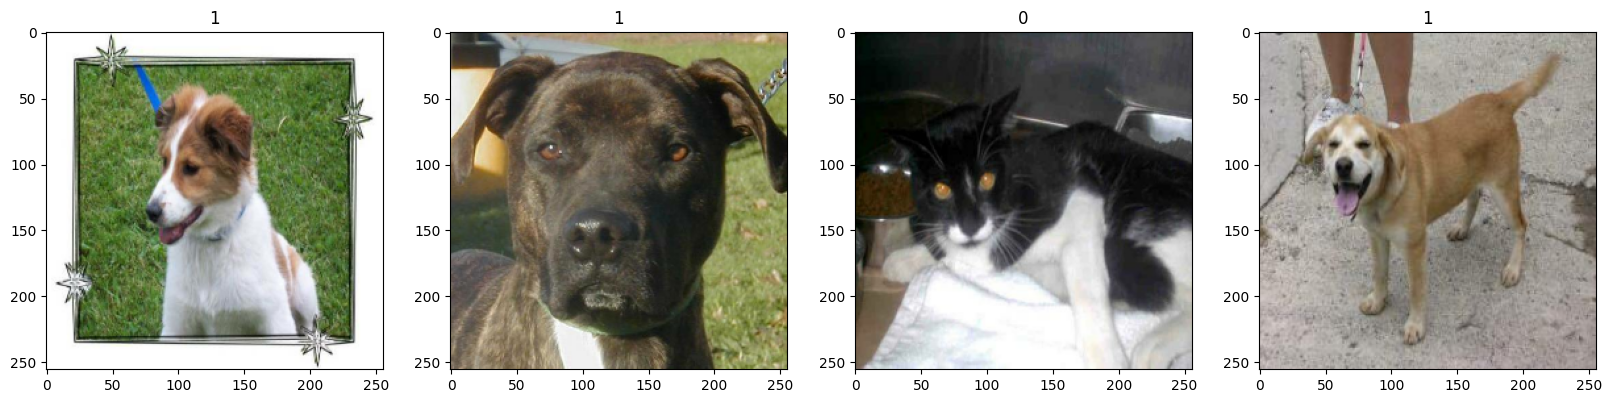

In [8]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.4964596 , 0.48861647, 0.53959686],
          [0.50062805, 0.49278492, 0.5437653 ],
          [0.5082874 , 0.50044423, 0.5514246 ],
          ...,
          [0.57078105, 0.5629379 , 0.6139183 ],
          [0.57595515, 0.568112  , 0.6190924 ],
          [0.56657475, 0.5587316 , 0.609712  ]],
 
         [[0.49933136, 0.49148822, 0.5424686 ],
          [0.50519216, 0.49734905, 0.5483294 ],
          [0.51130515, 0.503462  , 0.5544424 ],
          ...,
          [0.58506805, 0.5772249 , 0.6282053 ],
          [0.57423407, 0.56639093, 0.6173713 ],
          [0.56657475, 0.5587316 , 0.609712  ]],
 
         [[0.5044271 , 0.49658394, 0.5475643 ],
          [0.5081648 , 0.5003217 , 0.5513021 ],
          [0.51582414, 0.507981  , 0.5589614 ],
          ...,
          [0.5915594 , 0.5837163 , 0.63469666],
          [0.5748315 , 0.56698835, 0.61796874],
          [0.56717217, 0.55932903, 0.6103094 ]],
 
         ...,
 
         [[0.46666667, 0.4745098 , 0.53333336],
          [0.47058

In [10]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [11]:
train_size

547

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [13]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [15]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [17]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
547/547 [==============================] - 89s 141ms/step - loss: 0.5956 - accuracy: 0.6722 - val_loss: 0.5212 - val_accuracy: 0.7470
Epoch 2/10
547/547 [==============================] - 67s 122ms/step - loss: 0.4824 - accuracy: 0.7665 - val_loss: 0.4931 - val_accuracy: 0.7690
Epoch 3/10
547/547 [==============================] - 68s 124ms/step - loss: 0.3974 - accuracy: 0.8178 - val_loss: 0.4840 - val_accuracy: 0.7746
Epoch 4/10
547/547 [==============================] - 71s 128ms/step - loss: 0.2907 - accuracy: 0.8729 - val_loss: 0.5244 - val_accuracy: 0.7865
Epoch 5/10
547/547 [==============================] - 65s 118ms/step - loss: 0.1750 - accuracy: 0.9298 - val_loss: 0.6694 - val_accuracy: 0.7851
Epoch 6/10
547/547 [==============================] - 65s 118ms/step - loss: 0.0925 - accuracy: 0.9676 - val_loss: 0.8178 - val_accuracy: 0.7915
Epoch 7/10
547/547 [==============================] - 65s 118ms/step - loss: 0.0628 - accuracy: 0.9785 - val_loss: 0.9952 - val_ac

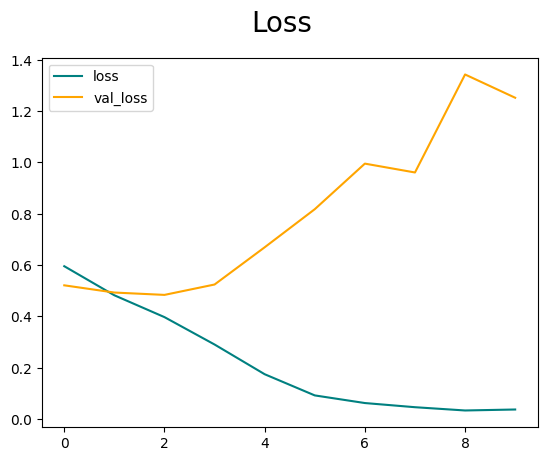

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

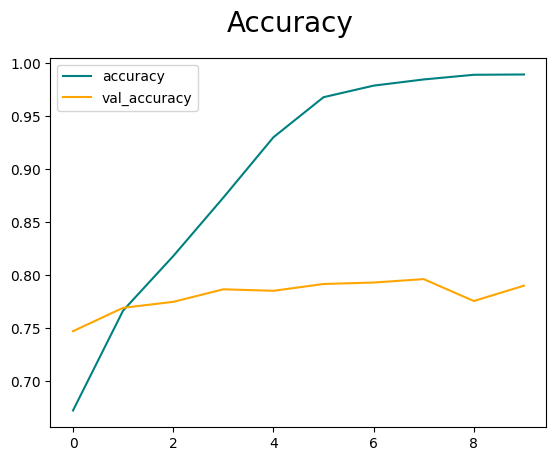

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [21]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [22]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [23]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [24]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7593298, shape=(), dtype=float32) tf.Tensor(0.7950558, shape=(), dtype=float32) tf.Tensor(0.7704327, shape=(), dtype=float32)


In [25]:
import cv2

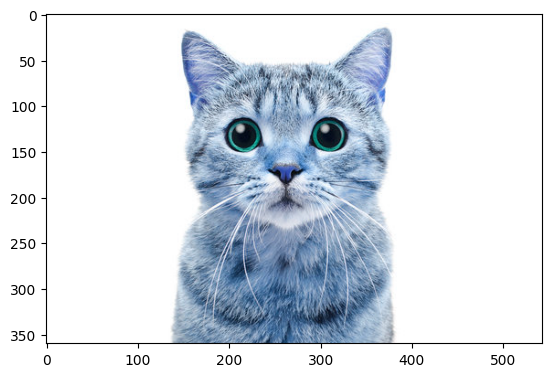

In [32]:
img = cv2.imread('cat.jpg')
plt.imshow(img)
plt.show()

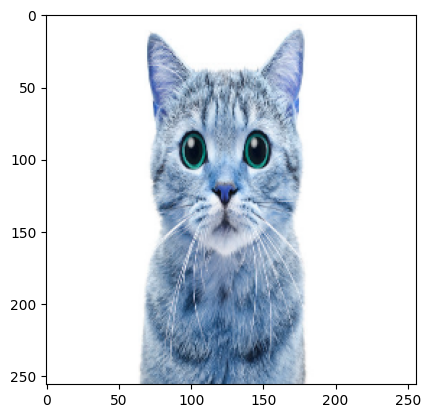

In [33]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [34]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [35]:
if yhat > 0.5: 
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is cat


In [30]:
from tensorflow.keras.models import load_model

In [36]:
yhat

array([[0.04950945]], dtype=float32)

In [32]:
model.save(os.path.join('yhat','imageclassifier.h5'))

In [33]:
new_model = load_model('models/imageclassifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.09608598]], dtype=float32)